# Overview

In the analysis below, we're using census tract-level data. Some of the tracts 
have been manually assigned "north" or "south" -- these are the tracts that 
lie in undisputed counties. Since the objective of this project is to determine 
if there are tracts that make up a third category, the exploratory analysis here 
seeks to help understand how we can approach this goal. 

The data contains two sets of features, "culture" and "census" variables:

```
culture_variables = [
    "dunkin_id",
    "wawa_id",
    "giants_or_jets",
    "pork_roll",
    "calm-no-l",
    "almond-no-l",
    "forward-no-r",
    "drawer",
    "gone-don",
]

census_variables = [
    "white_pop",
    "black_pop",
    "asian_pop",
    "occu_Agricul/fish/mining/forest",
    "occu_Construction",
    "occu_Manufacturing",
    "occu_Wholesale trade",
    "occu_Retail trade",
    "occu_transport/warehouse/utils",
    "occu_Information",
    "occu_finance/insurance/realestate",
    "occu_administrative",
    "occu_educational/healthcare/social",
    "occu_arts/entertainment/foodservices",
    "occu_public administration",
    "occu_management, business",
    "occu_Service occupations:",
    "occu_Sales and office occupations:",
    "occu_Natural resources, construction",
    "occu_production/transport/materials",
    "income_150k+",
    "pob_foreign_born",
    "edu_college",
]

```

I conduct basic exploratory analysis, such as: 

1. plot densities of each variable  
2. create a correlation matrix
3. plot the first two principal components

#### Takeaways

1. The clearest distinctions between the north and south are in cultural variables: 
sports, dialects, the popularity of Wawa
2. PCA results suggest clear and fairly substantially wide gap dividing two clusters. 
These early signs suggest that there is no third region -- no central jersey!

# Load Data

In [57]:
from IPython import get_ipython

if get_ipython() is not None:
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

import utils
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from centraljersey.models import PredictionModels
model = PredictionModels()
df = model.df_tracts
df["label"] = df["label"].str.replace("1", "north").str.replace("0", "south")

culture_variables = [
    "dunkin_id",
    "wawa_id",
    "giants_or_jets",
    "pork_roll",
    "calm-no-l",
    "almond-no-l",
    "forward-no-r",
    "drawer",
    "gone-don",
]

census_variables = [
    "white_pop",
    "black_pop",
    "asian_pop",
    "occu_Agricul/fish/mining/forest",
    "occu_Construction",
    "occu_Manufacturing",
    "occu_Wholesale trade",
    "occu_Retail trade",
    "occu_transport/warehouse/utils",
    "occu_Information",
    "occu_finance/insurance/realestate",
    "occu_administrative",
    "occu_educational/healthcare/social",
    "occu_arts/entertainment/foodservices",
    "occu_public administration",
    "occu_management, business",
    "occu_Service occupations:",
    "occu_Sales and office occupations:",
    "occu_Natural resources, construction",
    "occu_production/transport/materials",
    "income_150k+",
    "pob_foreign_born",
    "edu_college",
]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/chansoo/projects/centraljersey/centraljersey/models.py:17: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.df_county = self.merger.df_counties


# 1 Simple Density Plots of Features, North v South Comparison

Goal of this notebook is to examine the various datasets I've pulled and see how 
well the features separate North vs South Jersey. Which characteristics strongly 
identify North Jerseyans and which are more closely associated with South 
Jerseyans?

#### Culture-related features

/home/chansoo/projects/centraljersey/exploratory/utils.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax.set_xlabel(variable)


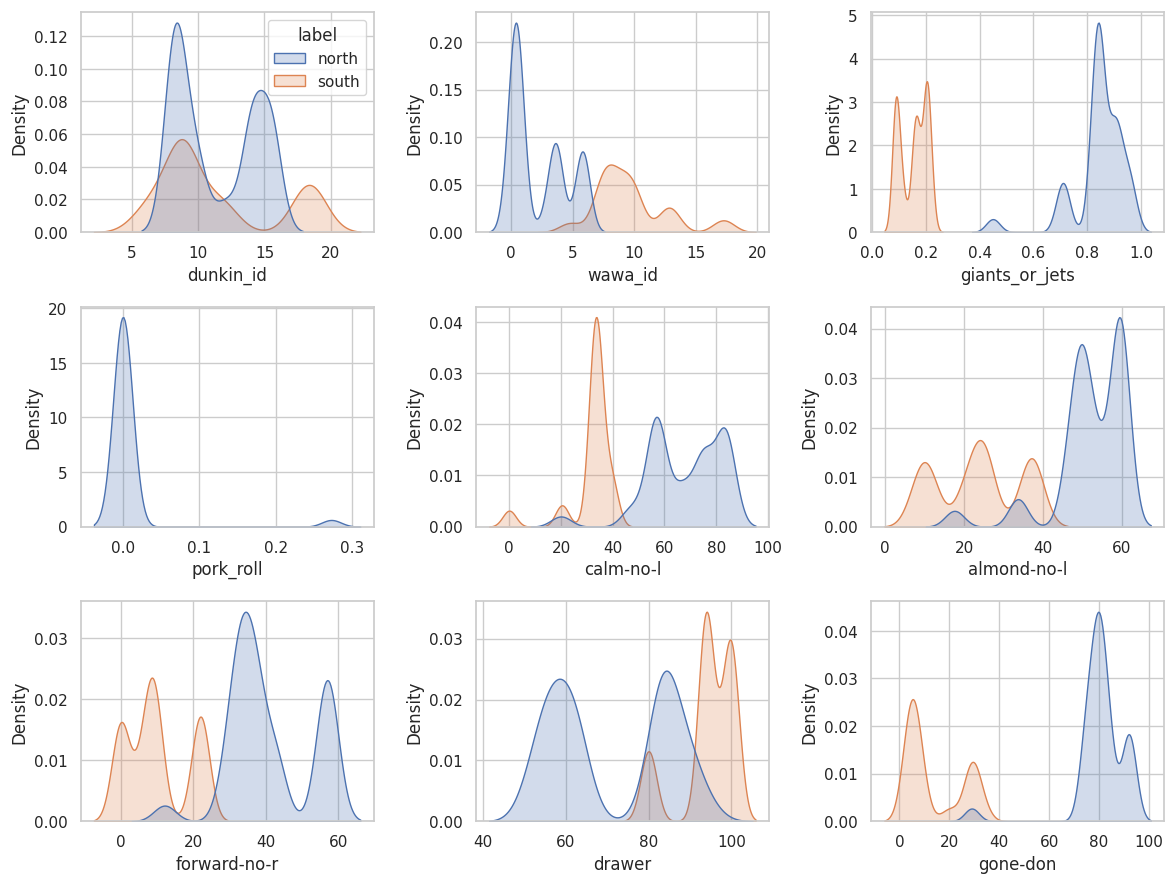

In [58]:
utils.plot_density_by_label_grid(data=df, variables=culture_variables)

#### Census-related features

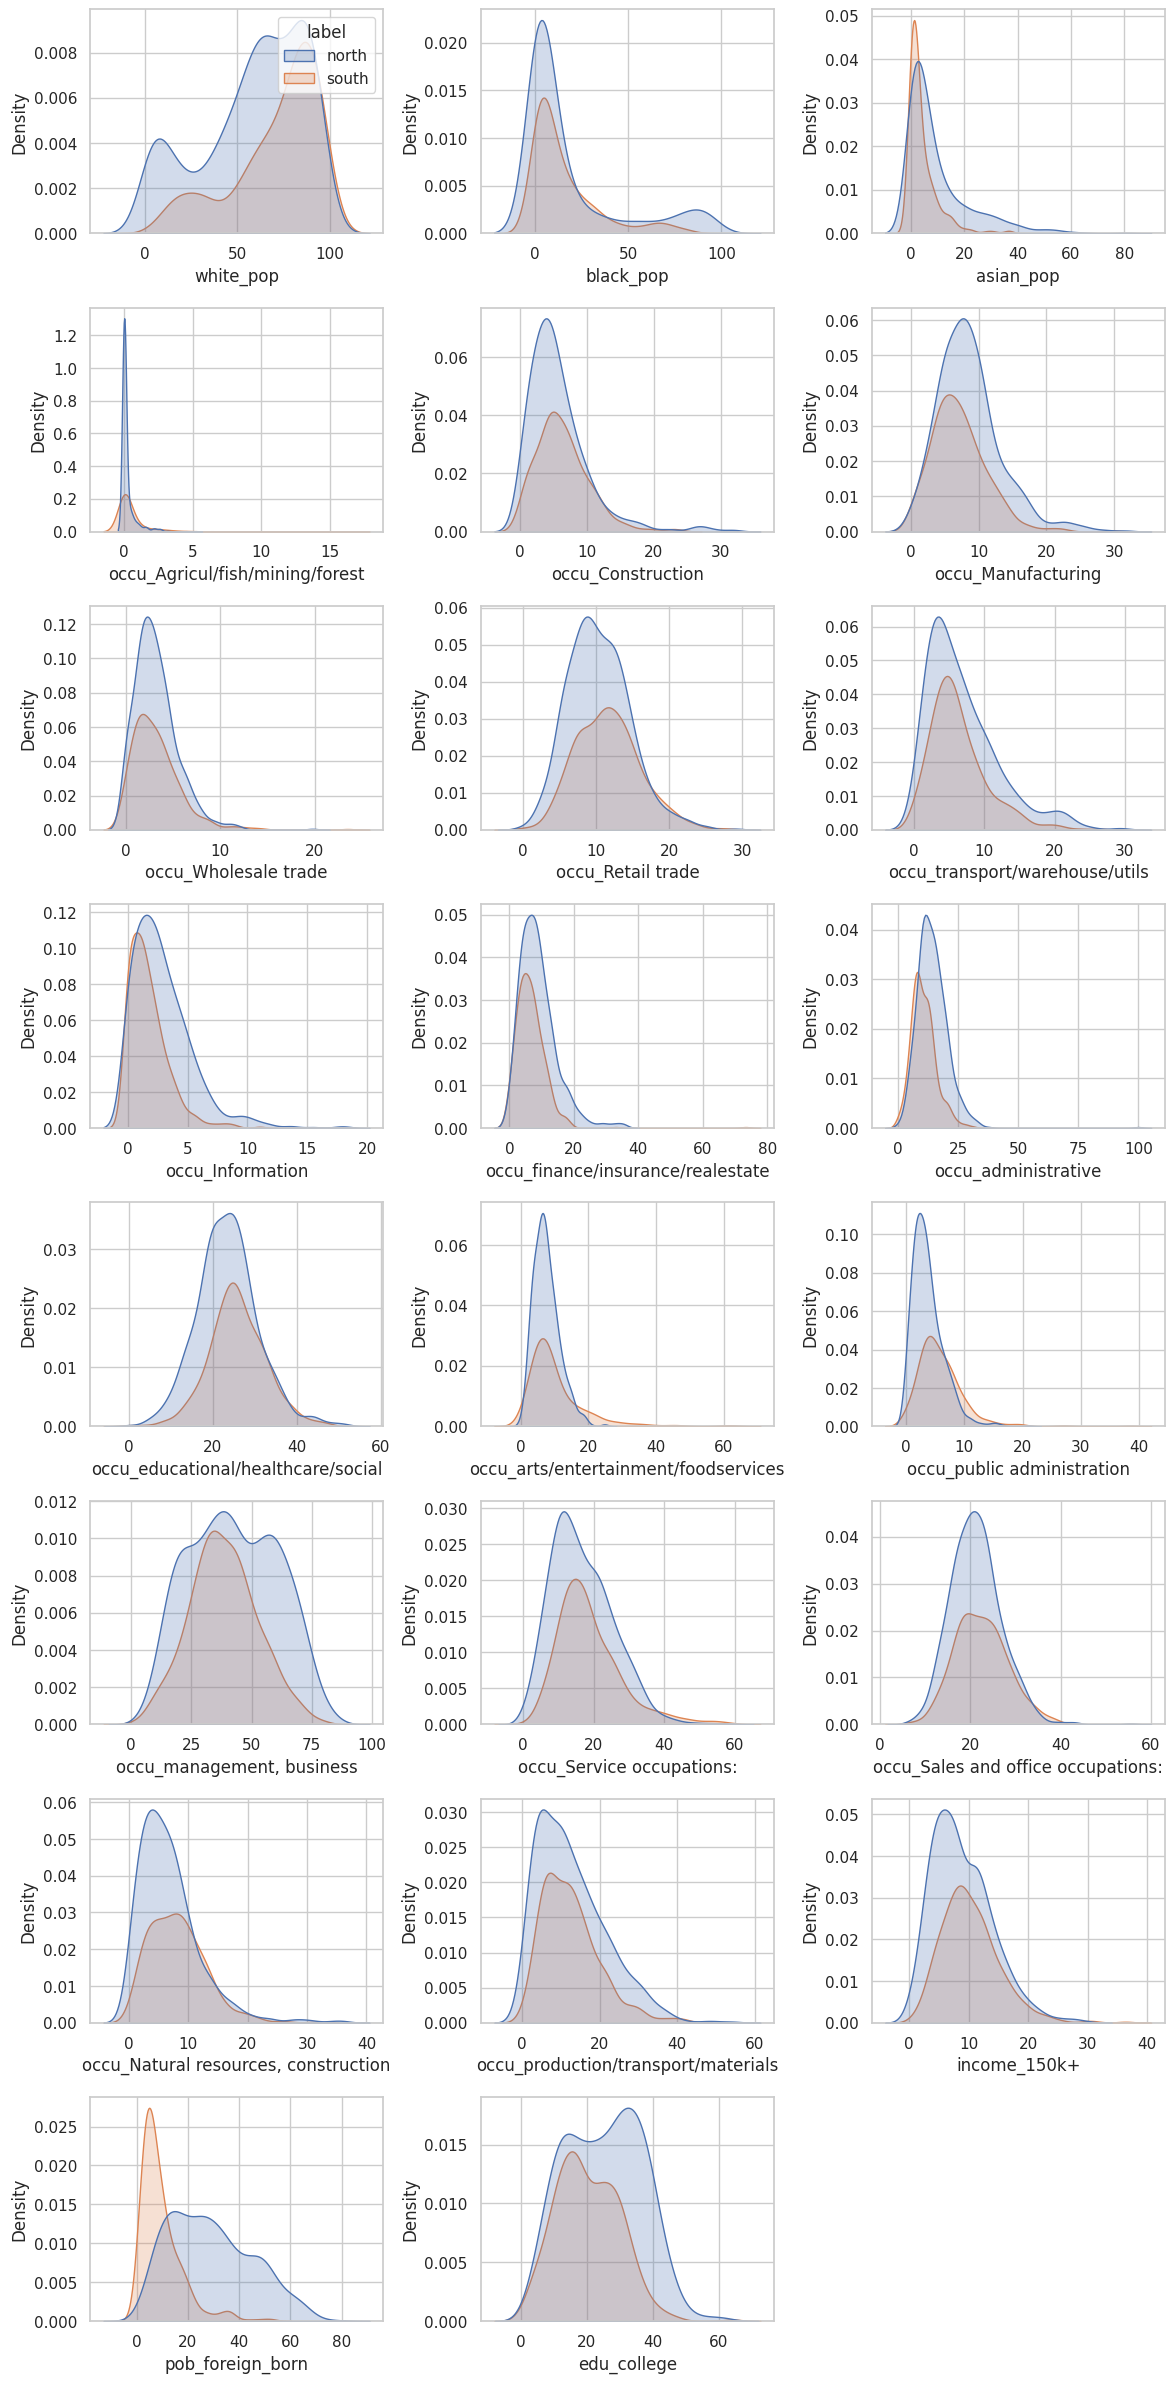

In [59]:
utils.plot_density_by_label_grid(data=df, variables=census_variables)


# 2 Correlations

In [60]:
corr_mat = df[census_variables + culture_variables].corr()

# create mask to exclude diagonal elements
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

heatmap of correlation

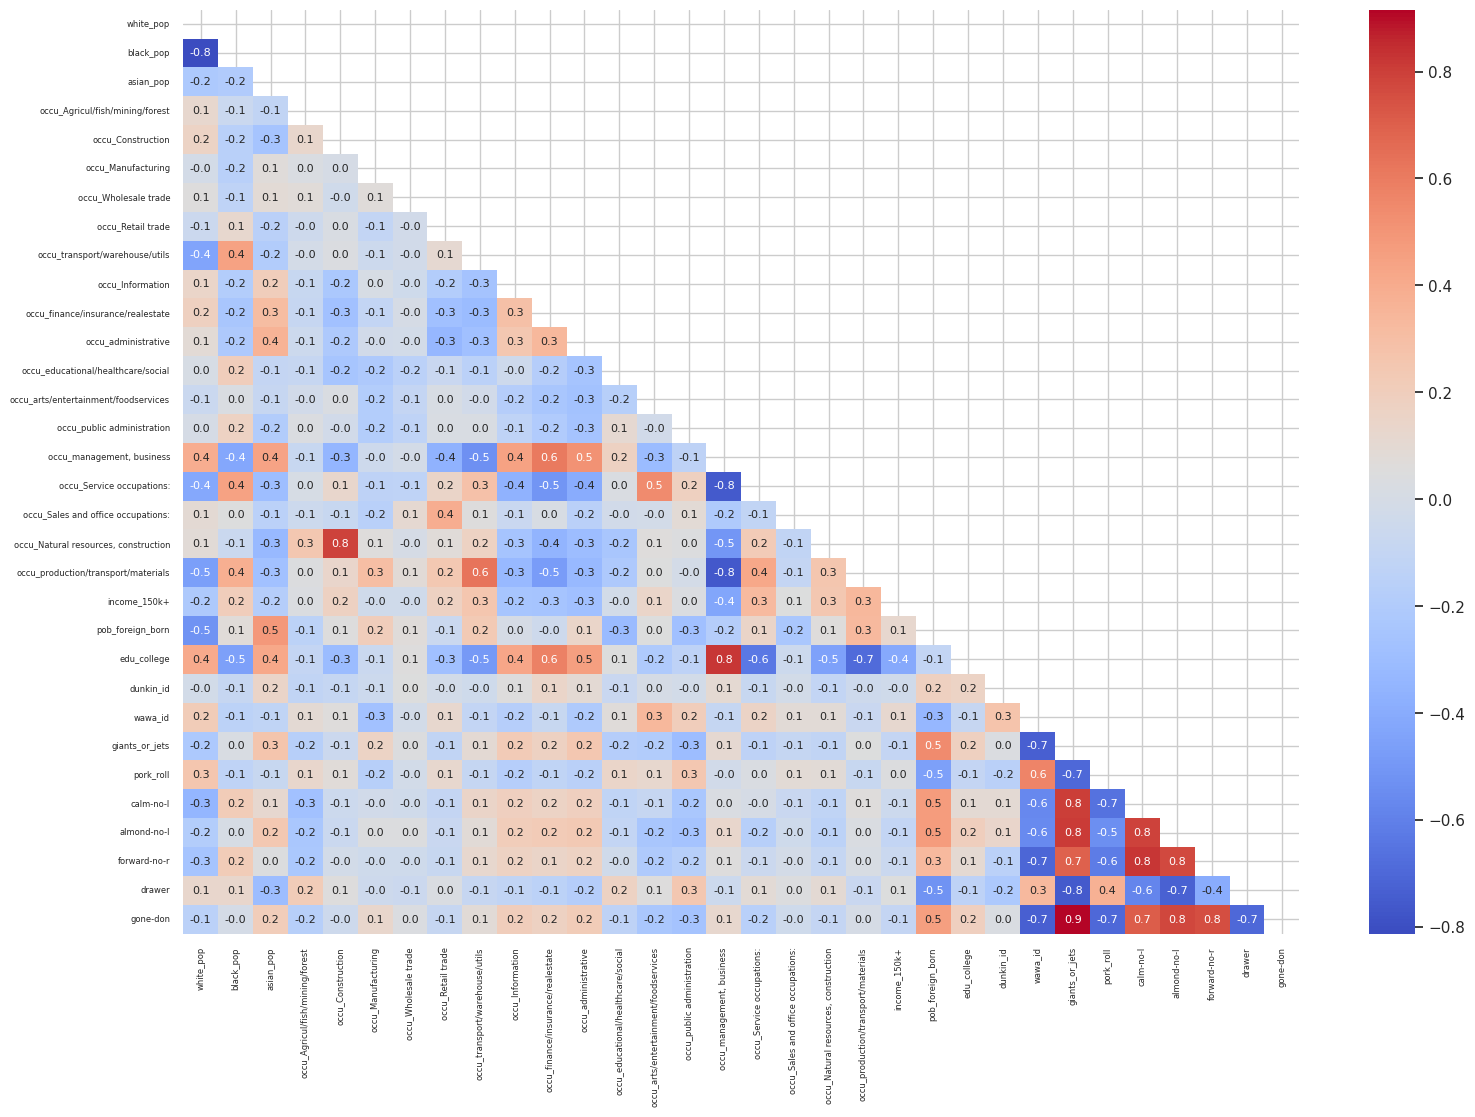

In [61]:
plt.figure(figsize=(18, 12))
# sns.set(rc={'figure.figsize':(18,12)})
custom_palette = "coolwarm"
heatmap = sns.heatmap(
    corr_mat, 
    mask=mask,
    annot=True, 
    fmt=".1f", 
    cmap=custom_palette, 
    annot_kws={"fontsize":8}
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=6)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=6)
plt.show()

# 3 Principle Components Analysis

In [62]:
X = df[census_variables + culture_variables].values
X = StandardScaler().fit_transform(X) 

In [63]:
pca = PCA(n_components=2)  # We will start by visualizing the first two principal components
principalComponents = pca.fit_transform(X)

# converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDf["label"] = df["label"]
principalDf.loc[principalDf["label"].isnull(), "label"] = "none"


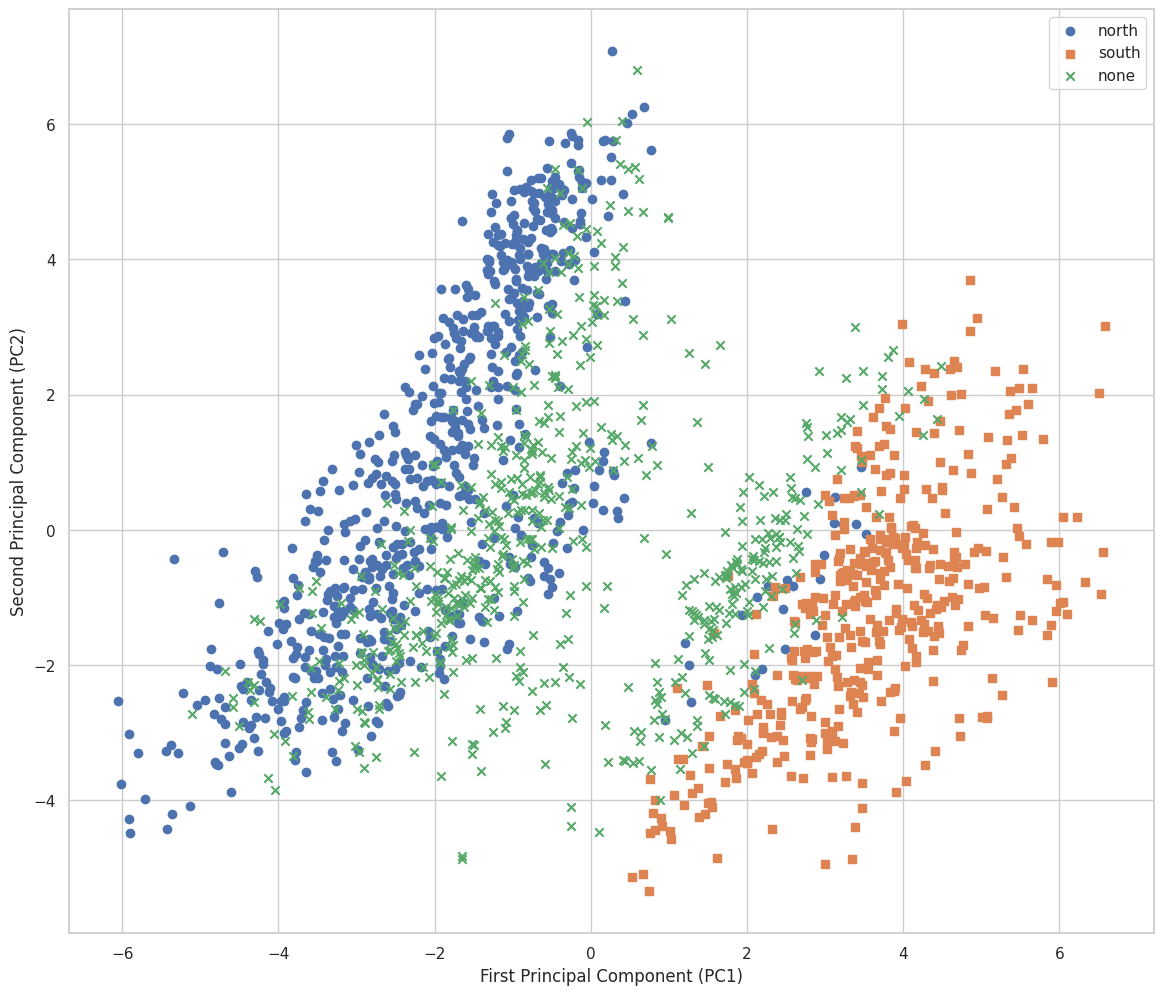

In [102]:
plt.figure(figsize=(14,12))
label_dict = {'north': 0, 'south': 1, "none": -2}
markers = ['o', 's', 'x']
labels = ['north', 'south', 'none']

# Loop through the categories and plot the data points
for category, marker, label in zip(label_dict.values(), markers, labels):
    indices = principalDf['label'].map(label_dict) == category
    plt.scatter(
        principalDf.loc[indices, 'PC1'], 
        principalDf.loc[indices, 'PC2'], 
        marker=marker,
        label=label
    )
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')

# Add a colorbar and set the label
plt.legend()

plt.show()
